## 3. Finish the search problem

Please using the search policy to implement an agent. This agent receives two input, one is @param start station and the other is @param destination. Your agent should give the optimal route based on Beijing Subway system. 

> Deadline: 2019-July-13

>Submit: Submit the source code and result to github. 

![](https://timgsa.baidu.com/timg?image&quality=80&size=b9999_10000&sec=1562414356407&di=b57814aafd215bb8b8d9d8cd37c573d6&imgtype=0&src=http%3A%2F%2Fcli.clewm.net%2Ffile%2F2015%2F03%2F24%2F174ed60082b8422ac0636cfd3efb9e7f.jpg)

#### Dataflow: 

##### 1.	Get data from web page.

> a.	Get web page source from: https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%81/408485

> b.	You may need @package **requests**[https://2.python-requests.org/en/master/] page to get the response via url

> c.	You may need save the page source to file system.

> d.	The target of this step is to get station information of all the subway lines;

> e.	You may need install @package beautiful soup[https://www.crummy.com/software/BeautifulSoup/bs4/doc/]  to get the url information, or just use > Regular Expression to get the url.  Our recommendation is that using the Regular Expression and BeautiflSoup both. 

> f.	You may need BFS to get all the related page url from one url. 
Question: Why do we use BFS to traverse web page (or someone said, build a web spider)?  Can DFS do this job? which is better? 

##### 2.	Preprocessing data from page source.

> a.	Based on the page source gotten from url. You may need some more preprocessing of the page. 

> b.	the Regular Expression you may need to process the text information.

> c.	You may need @package networkx, @package matplotlib to visualize data. 

> d.	You should build a dictionary or graph which could represent the connection information of Beijing subway routes. 

> e.	You may need the defaultdict, set data structures to implement this procedure. 

##### 3. Build the search agent

> Build the search agent based on the graph we build.

for example, when you run: 

```python
>>> search('奥体中心', '天安门') 
```
you need get the result: 

奥体中心-> A -> B -> C -> ... -> 天安门

***

In [2]:
import requests

In [3]:
from bs4 import BeautifulSoup

In [4]:
from collections import defaultdict

### 获得地铁各站点关联信息

In [5]:
def get_page(url):
    """get page info"""
    r = requests.get(url, headers={"User-Agent":"Mozilla/5.0 (Windows NT 10.0; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/63.0.3239.132 Safari/537.36"})
    r.raise_for_status()
    r.encoding = r.apparent_encoding
    return r.text

In [6]:
url = "http://bj.bendibao.com/ditie/linemap.shtml"

In [7]:
get_page(url)

'\r\n\r\n<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">\r\n<html xmlns="http://www.w3.org/1999/xhtml">\r\n<head>\r\n<meta http-equiv="Content-Type" content="text/html; charset=gb2312" />\r\n<title>北京地铁线路图，2019最新北京地铁线路图，北京地铁地图-北京本地宝</title>\r\n<meta content="北京地铁线路图,2019北京地铁最新线路图,北京地铁地图" name="Keywords" />\r\n<meta content="北京本地宝交通频道为你带来北京地铁线路图，2019北京地铁最新线路图的详细信息" name="Description" />\r\n<meta name="renderer" content="webkit">\r\n\r\n<link rel="stylesheet" href="http://jtapi.bendibao.com/ditie/css/cssreset.min.css" />\r\n<link rel="stylesheet" href="http://jtapi.bendibao.com/ditie/css/metro.min.css" />\r\n<link rel="stylesheet" href="http://jtapi.bendibao.com/ditie/css/linecolor.min.css" />\r\n<link rel="stylesheet" href="http://jtapi.bendibao.com/ditie/css/timetable.min.css" />\r\n<link rel="stylesheet" href="http://jtapi.bendibao.com/ditie/css/top.css" />\r\n\r\n\r\n<meta http-equiv="mobile-agent" content="for

In [8]:
def get_subway_line_list(html):
    """get subway line list and stations"""
    subway_line_list = defaultdict(list)
    soup = BeautifulSoup(html,"html.parser")
    s = soup.find(name="div",attrs={'class':'s-main'})
    for line in s.find_all(attrs={"class":"line-list"}):
        subway_name = line.select(".line-list-heading>.wrap a")[0].get_text()
        if subway_name not in subway_line_list.keys():
            subway_line_list[subway_name] = []
        for j in line.select(".line-list-body>.line-list-station>.station a[class='link']"):
            # print(j.get_text())
            subway_line_list[subway_name].append(j.get_text())
    
    return subway_line_list

In [9]:
get_subway_line_list(get_page(url))

defaultdict(list,
            {'北京地铁1号线(M1)线路图': ['苹果园',
              '古城',
              '八角游乐园',
              '八宝山',
              '玉泉路',
              '五棵松',
              '万寿路',
              '公主坟',
              '军事博物馆',
              '木樨地',
              '南礼士路',
              '复兴门',
              '西单',
              '天安门西',
              '天安门东',
              '王府井',
              '东单',
              '建国门',
              '永安里',
              '国贸',
              '大望路',
              '四惠',
              '四惠东'],
             '北京地铁2号线(内环)线路图': ['积水潭',
              '鼓楼大街',
              '安定门',
              '雍和宫',
              '东直门',
              '东四十条',
              '朝阳门',
              '建国门',
              '北京站',
              '崇文门',
              '前门',
              '和平门',
              '宣武门',
              '长椿街',
              '复兴门',
              '阜成门',
              '车公庄',
              '西直门'],
             '北京地铁2号线(外环)线路图': ['西直门',
              '车公庄',
              '阜成门',

In [10]:
def get_station_connection(subway_line_list):
    """get station connection"""
    station_connection = defaultdict(list)
    for station_list in subway_line_list.values():
        for index,station in enumerate(station_list[:-1]):
            if station_list[index+1] not in station_connection[station]:
                station_connection[station].append(station_list[index+1])
            if station not in station_connection[station_list[index+1]]:
                station_connection[station_list[index+1]].append(station)
    return station_connection

In [11]:
station_connection = get_station_connection(get_subway_line_list(get_page(url)))

In [12]:
station_connection

defaultdict(list,
            {'苹果园': ['古城'],
             '古城': ['苹果园', '八角游乐园'],
             '八角游乐园': ['古城', '八宝山'],
             '八宝山': ['八角游乐园', '玉泉路'],
             '玉泉路': ['八宝山', '五棵松'],
             '五棵松': ['玉泉路', '万寿路'],
             '万寿路': ['五棵松', '公主坟'],
             '公主坟': ['万寿路', '军事博物馆', '莲花桥', '西钓鱼台'],
             '军事博物馆': ['公主坟', '木樨地', '北京西站', '白堆子'],
             '木樨地': ['军事博物馆', '南礼士路'],
             '南礼士路': ['木樨地', '复兴门'],
             '复兴门': ['南礼士路', '西单', '长椿街', '阜成门'],
             '西单': ['复兴门', '天安门西', '灵境胡同', '宣武门'],
             '天安门西': ['西单', '天安门东'],
             '天安门东': ['天安门西', '王府井'],
             '王府井': ['天安门东', '东单'],
             '东单': ['王府井', '建国门', '崇文门', '灯市口'],
             '建国门': ['东单', '永安里', '朝阳门', '北京站'],
             '永安里': ['建国门', '国贸'],
             '国贸': ['永安里', '大望路', '金台夕照', '双井'],
             '大望路': ['国贸', '四惠', '九龙山', '金台路'],
             '四惠': ['大望路', '四惠东'],
             '四惠东': ['四惠', '高碑店'],
             '积水潭': ['鼓楼大街'],
          

### 获取地铁站点经纬度坐标

In [13]:
def get_coordinate(station):
    address = "北京地铁" + station
    key = "28d5449c139fcc8f733f0b624d45c1c6" # web服务key
    base_url = "https://restapi.amap.com/v3/geocode/geo"  # 高德地图API
    try:
        r = requests.get(base_url, params={"address":address,"key":key})
        r.raise_for_status()
        r.encoding = r.apparent_encoding
    except Exception as e:
        print(e)
        
    json_content = r.json()
    lat, long = json_content["geocodes"][0]["location"].split(",")
    coordinate = (float(lat), float(long))
    return coordinate

In [14]:
get_coordinate("朝阳门站")

(116.434967, 39.924862)

In [15]:
def get_station_location():
    station_location = {}
    for station in station_connection.keys():
        md_station = station + "站"
        station_location[station] = get_coordinate(md_station)
    return station_location

In [16]:
get_station_location()

{'苹果园': (116.178684, 39.926352),
 '古城': (116.190813, 39.9075),
 '八角游乐园': (116.224351, 39.910415),
 '八宝山': (116.236066, 39.906763),
 '玉泉路': (116.253128, 39.907061),
 '五棵松': (116.294426, 39.907444),
 '万寿路': (116.294765, 39.907474),
 '公主坟': (116.309035, 39.906507),
 '军事博物馆': (116.323385, 39.907422),
 '木樨地': (116.3396, 39.90575),
 '南礼士路': (116.352073, 39.907296),
 '复兴门': (116.357115, 39.908136),
 '西单': (116.376491, 39.907781),
 '天安门西': (116.3882, 39.90725),
 '天安门东': (116.400642, 39.907341),
 '王府井': (116.411438, 39.908009),
 '东单': (116.418413, 39.908608),
 '建国门': (116.43592, 39.90848),
 '永安里': (116.452349, 39.907049),
 '国贸': (116.459613, 39.907824),
 '大望路': (116.472782, 39.902303),
 '四惠': (116.496588, 39.909649),
 '四惠东': (116.515664, 39.908495),
 '积水潭': (116.372796, 39.94809),
 '鼓楼大街': (116.393467, 39.948989),
 '安定门': (116.407526, 39.90403),
 '雍和宫': (116.407526, 39.90403),
 '东直门': (116.435324, 39.94164),
 '东四十条': (116.435611, 39.934648),
 '朝阳门': (116.434967, 39.924862),
 '北京站': (116.427937,

In [17]:
station_location = get_station_location()

In [47]:
import math

In [48]:
def geo_distance(origin, destination):
    """
    Calculate the Haversine distance.

    Parameters
    ----------
    origin : tuple of float
        (lat, long)
    destination : tuple of float
        (lat, long)

    Returns
    -------
    distance_in_km : float

    Examples
    --------
    >>> origin = (48.1372, 11.5756)  # Munich
    >>> destination = (52.5186, 13.4083)  # Berlin
    >>> round(distance(origin, destination), 1)
    504.2
    """
    lat1, lon1 = origin
    lat2, lon2 = destination
    radius = 6371  # km

    dlat = math.radians(lat2 - lat1)
    dlon = math.radians(lon2 - lon1)
    a = (math.sin(dlat / 2) * math.sin(dlat / 2) +
         math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) *
         math.sin(dlon / 2) * math.sin(dlon / 2))
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    d = radius * c

    return d

In [19]:
import networkx as nx
station_graph = nx.Graph()
station_graph.add_nodes_from(list(station_connection.keys()))
nx.draw(station_graph, station_location, with_labels=False, node_size=10)

#### 使用networkx显示城市地图

In [20]:
import networkx as nx

In [21]:
station_connection_with_road = nx.Graph(station_connection)

#### 解决networkx中文显示的方法

In [22]:
#以下两句是显示中文的方法
#from pylab import *
#mpl.rcParams['font.sans-serif'] = ['SimHei']   #有效的方法

F:\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


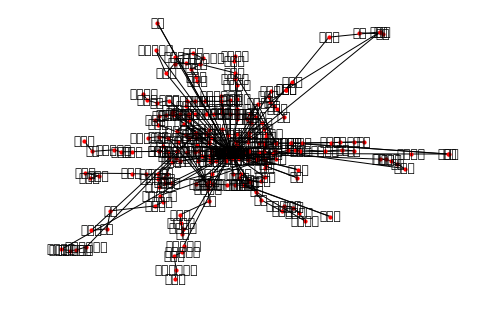

In [23]:
nx.draw(station_connection_with_road, station_location, with_labels=True, node_size=10)

### 获得地铁站间距离---ps：简单直接，但不全。。

In [24]:
import re

In [25]:
url = "http://bj.bendibao.com/traffic/20141217/174547.shtm"

In [26]:
get_page(url)

'<!DOCTYPE HTML><html><head><meta http-equiv="Content-Type" content="text/html; charset=utf-8"/><meta http-equiv="Content-Language" content="zh-cn"/><meta name="viewport" content="width=device-width, initial-scale=1.0,  minimum-scale=1.0, maximum-scale=1.0" /><title>北京地铁1号线站间距离全程查询表- 北京本地宝</title><meta name="description" content="北京本地宝北京交通提供北京地铁1号线站间距离全程查询表有关的信息，1号线相邻站间距信息统计表起始/终到车站区间距离（米）方向苹果园——古城2606上行/下行古城——八角游乐园" /><meta http-equiv="Cache-Control" content="no-transform" />\r\n<meta name="location" content="province=北京;city=北京;coord=116.395645,39.929986">\r\n<meta name="keywords" content="北京地铁站间距离,北京地铁站间公里数,北京地铁站间距,北京地铁站间里程,北京地铁1号线站间距离全程查询表" /><link rel="Shortcut Icon" href="/favicon.ico" /><meta http-equiv="mobile-agent" content="format=html5; url=http://m.bj.bendibao.com/traffic/174547.html" /><meta http-equiv="mobile-agent" content="format=xhtml; url=http://m.bj.bendibao.com/traffic/174547.html" /><link rel="alternate" media="only screen and(max-width: 640px)" href="http://m.bj.b

In [41]:
def get_subway_url_list(html):
    """get subway url list"""
    subway_url_list = []
    soup = BeautifulSoup(html,"html.parser")
    s = soup.find(attrs={'class':'content_l'})
    for url in s.find_all("a",target="_blank",href=re.compile("traffic"),text=re.compile("站间距离")):
        #print(url.string)
        subway_url_list.append(url.attrs["href"])
    return subway_url_list

In [28]:
get_subway_url_list(get_page(url))

['http://bj.bendibao.com/traffic/20141217/174565.shtm',
 'http://bj.bendibao.com/traffic/20141217/174564.shtm',
 'http://bj.bendibao.com/traffic/20141217/174562.shtm',
 'http://bj.bendibao.com/traffic/20141217/174561.shtm',
 'http://bj.bendibao.com/traffic/20141217/174560.shtm',
 'http://bj.bendibao.com/traffic/20141217/174559.shtm',
 'http://bj.bendibao.com/traffic/20141217/174558.shtm',
 'http://bj.bendibao.com/traffic/20141217/174557.shtm',
 'http://bj.bendibao.com/traffic/20141217/174556.shtm',
 'http://bj.bendibao.com/traffic/20141217/174555.shtm',
 'http://bj.bendibao.com/traffic/20141217/174554.shtm',
 'http://bj.bendibao.com/traffic/20141217/174553.shtm',
 'http://bj.bendibao.com/traffic/20141217/174552.shtm',
 'http://bj.bendibao.com/traffic/20141217/174551.shtm',
 'http://bj.bendibao.com/traffic/20141217/174550.shtm',
 'http://bj.bendibao.com/traffic/20141217/174549.shtm',
 'http://bj.bendibao.com/traffic/20141217/174548.shtm',
 'http://bj.bendibao.com/traffic/20141217/174547

In [42]:
def get_stations_distance(subway_url_list):
    stations_distance = defaultdict(None)
    for sub_url in subway_url_list:
        html = get_page(sub_url)
        soup = BeautifulSoup(html,"html.parser")
        s = soup.find("table",attrs={"class":"ke-zeroborder"})
        b = s.find("tbody").children
        for tr in b:
            if len(tr.find("th").contents) == 1:
                sta_name1 = tuple(tr.find("th").string.split("——"))
                sta_name2 = tuple([tr.find("th").string.split("——")[1],tr.find("th").string.split("——")[0]])
            else:
                sta_name1 = tuple([tr.find("th").contents[0].split("——")[0], tr.find("th").contents[1].get_text()])
                sta_name2 = tuple([tr.find("th").contents[1].get_text(), tr.find("th").contents[0].split("——")[0]])
            sta_distance = tr.find("td").string
            stations_distance[sta_name1] = sta_distance
            stations_distance[sta_name2] = sta_distance
    return stations_distance

In [30]:
stations_distance = get_stations_distance(get_subway_url_list(get_page(url)))

In [31]:
stations_distance

defaultdict(None,
            {('东直门', '三元桥'): '3022',
             ('三元桥', '东直门'): '3022',
             ('三元桥', 'T3航站楼'): '18322',
             ('T3航站楼', '三元桥'): '18322',
             ('T3航站楼', 'T2航站楼'): '7243',
             ('T2航站楼', 'T3航站楼'): '7243',
             ('T2航站楼', '三元桥'): '20738',
             ('三元桥', 'T2航站楼'): '20738',
             ('郭公庄', '大葆台'): '1405',
             ('大葆台', '郭公庄'): '1405',
             ('大葆台', '稻田'): '6466',
             ('稻田', '大葆台'): '6466',
             ('稻田', '长阳'): '4041',
             ('长阳', '稻田'): '4041',
             ('长阳', '篱笆房'): '2150',
             ('篱笆房', '长阳'): '2150',
             ('篱笆房', '广阳城'): '1474',
             ('广阳城', '篱笆房'): '1474',
             ('广阳城', '良乡大学城北'): '2003',
             ('良乡大学城北', '广阳城'): '2003',
             ('良乡大学城北', '良乡大学城'): '1188',
             ('良乡大学城', '良乡大学城北'): '1188',
             ('良乡大学城', '良乡大学城西'): '1738',
             ('良乡大学城西', '良乡大学城'): '1738',
             ('良乡大学城西', '良乡南关'): '1332',
             ('

### 计算地铁站点到站点的最小距离(利用地铁站的经纬度坐标)

In [43]:
def search_1(start, destination, connection_graph, sorted_candidate=len):
    """BFS 实现路径搜索"""
    pathes = [[start]]
    visited = set()
    res = []
    while pathes:
        path_is_fea = False
        path = pathes.pop(0) # 路线组合列表
        city = path[-1] # 单条路线最后一个城市
        if city in visited:continue
        for successor in connection_graph[city]:
            if successor in path: continue
            new_path = path + [successor]
            
            if successor == destination: 
                res.append(new_path)
                path_is_fea = True
            else:
                pathes.append(new_path)
                
        visited.add(city)
        if path_is_fea:
            visited.clear()
    return sorted_candidate(res)  # 对所有符合的路径进行排序

In [44]:
search_1("五棵松", "天安门西", station_connection)

17

In [45]:
def shortest_path_first_1(pathes):
    """比较各条路线距离，求出最短路径"""
    if len(pathes) <= 1: return pathes
    def get_path_distance(path):
        distance = 0
        for index,station in enumerate(path[:-1]):
            distance += geo_distance(station_location[station], station_location[path[index+1]])
        return distance
    return sorted(pathes, key=get_path_distance, reverse=False)

In [49]:
search_1("北京西站", "磁器口", station_connection, sorted_candidate = shortest_path_first_1)

[['北京西站', '湾子', '达官营', '广安门内', '菜市口', '虎坊桥', '珠市口', '桥湾', '磁器口'],
 ['北京西站',
  '军事博物馆',
  '白堆子',
  '白石桥南',
  '车公庄西',
  '车公庄',
  '平安里',
  '北海北',
  '南锣鼓巷',
  '东四',
  '朝阳门',
  '建国门',
  '北京站',
  '崇文门',
  '磁器口'],
 ['北京西站',
  '军事博物馆',
  '白堆子',
  '白石桥南',
  '车公庄西',
  '车公庄',
  '平安里',
  '北海北',
  '南锣鼓巷',
  '东四',
  '朝阳门',
  '东大桥',
  '呼家楼',
  '金台夕照',
  '国贸',
  '永安里',
  '建国门',
  '北京站',
  '崇文门',
  '磁器口'],
 ['北京西站',
  '军事博物馆',
  '白堆子',
  '白石桥南',
  '车公庄西',
  '车公庄',
  '平安里',
  '北海北',
  '南锣鼓巷',
  '东四',
  '朝阳门',
  '东大桥',
  '呼家楼',
  '金台夕照',
  '国贸',
  '双井',
  '广渠门外',
  '广渠门内',
  '磁器口'],
 ['北京西站',
  '军事博物馆',
  '白堆子',
  '白石桥南',
  '车公庄西',
  '车公庄',
  '平安里',
  '北海北',
  '南锣鼓巷',
  '东四',
  '朝阳门',
  '东大桥',
  '呼家楼',
  '金台夕照',
  '国贸',
  '永安里',
  '建国门',
  '东单',
  '崇文门',
  '磁器口'],
 ['北京西站',
  '军事博物馆',
  '白堆子',
  '白石桥南',
  '车公庄西',
  '车公庄',
  '西直门',
  '大钟寺',
  '知春路',
  '西土城',
  '牡丹园',
  '健德门',
  '北土城',
  '安贞门',
  '惠新西街南口',
  '和平西桥',
  '和平里北街',
  '雍和宫',
  '北新桥',
  '张自忠路',
  '东四',
  '灯市口',
  '东单',
  '崇文门',
  '磁器口'],
 ['北京西站'

In [ ]:
def pretty_print(cities):
    print('🚗->'.join(cities))

In [ ]:
pretty_print(search_1("北京西站", "磁器口", station_connection, sorted_candidate = shortest_path_first_1)[0])  #最短距离

### 计算地铁站点到站点的最小距离(利用地铁站间距离)

In [62]:
def search_2(start, destination, connection_graph, sorted_candidate=len):
    """BFS 实现路径搜索"""
    pathes = [[start]]
    visited = set()
    res = []
    while pathes:
        path_is_fea = False
        path = pathes.pop(0) # 路线组合列表
        city = path[-1] # 单条路线最后一个城市
        if city in visited:continue
        for successor in connection_graph[city]:
            if successor in path: continue
            new_path = path + [successor]
            
            if successor == destination: 
                res.append(new_path)
                path_is_fea = True
            else:
                pathes.append(new_path)
                
        visited.add(city)
        if path_is_fea:
            visited.clear()
    return sorted_candidate(res)  # 对所有符合的路径进行排序

In [63]:
search_2("五棵松", "天安门西", station_connection)

17

In [64]:
def shortest_path_first_2(pathes):
    """比较各条路线距离，求出最短路径"""
    if len(pathes) <= 1: return pathes
    def get_path_distance(path):
        distance = 0
        for index, station in enumerate(path[:-1]):
            if (station, path[index+1]) in stations_distance:
                distance += int(stations_distance[(station, path[index+1])])
            else:
                distance += 500
        print("%s:%s" % (path, distance))
        return distance
    return sorted(pathes, key = get_path_distance, reverse = False)

In [65]:
search_2("北京西站", "磁器口", station_connection, sorted_candidate = shortest_path_first_2)[0]

['北京西站', '湾子', '达官营', '广安门内', '菜市口', '虎坊桥', '珠市口', '桥湾', '磁器口']:8892
['北京西站', '湾子', '达官营', '广安门内', '菜市口', '宣武门', '和平门', '前门', '崇文门', '磁器口']:10601
['北京西站', '湾子', '达官营', '广安门内', '菜市口', '陶然亭', '北京南站', '永定门外', '景泰', '蒲黄榆', '天坛东门', '磁器口']:12343
['北京西站', '军事博物馆', '白堆子', '白石桥南', '车公庄西', '车公庄', '平安里', '北海北', '南锣鼓巷', '东四', '朝阳门', '建国门', '北京站', '崇文门', '磁器口']:17448
['北京西站', '湾子', '达官营', '广安门内', '菜市口', '宣武门', '和平门', '前门', '崇文门', '北京站', '建国门', '永安里', '国贸', '双井', '广渠门外', '广渠门内', '磁器口']:19330
['北京西站', '湾子', '达官营', '广安门内', '菜市口', '陶然亭', '北京南站', '永定门外', '景泰', '蒲黄榆', '方庄', '十里河', '潘家园', '劲松', '双井', '广渠门外', '广渠门内', '磁器口']:17095
['北京西站', '军事博物馆', '白堆子', '白石桥南', '车公庄西', '车公庄', '平安里', '北海北', '南锣鼓巷', '东四', '朝阳门', '东大桥', '呼家楼', '金台夕照', '国贸', '双井', '广渠门外', '广渠门内', '磁器口']:22393
['北京西站', '军事博物馆', '白堆子', '白石桥南', '车公庄西', '车公庄', '平安里', '北海北', '南锣鼓巷', '东四', '朝阳门', '东大桥', '呼家楼', '金台夕照', '国贸', '永安里', '建国门', '东单', '崇文门', '磁器口']:22017
['北京西站', '军事博物馆', '白堆子', '白石桥南', '车公庄西', '车公庄', '平安里', '北海北', '南锣鼓巷', '东四', '朝阳门', '东大

['北京西站', '湾子', '达官营', '广安门内', '菜市口', '虎坊桥', '珠市口', '桥湾', '磁器口']

In [66]:
def pretty_print(cities):
    print('🚗->'.join(cities))

In [67]:
pretty_print(search_2("北京西站", "磁器口", station_connection, sorted_candidate = shortest_path_first_2)[0])  #最短距离

['北京西站', '湾子', '达官营', '广安门内', '菜市口', '虎坊桥', '珠市口', '桥湾', '磁器口']:8892
['北京西站', '湾子', '达官营', '广安门内', '菜市口', '宣武门', '和平门', '前门', '崇文门', '磁器口']:10601
['北京西站', '湾子', '达官营', '广安门内', '菜市口', '陶然亭', '北京南站', '永定门外', '景泰', '蒲黄榆', '天坛东门', '磁器口']:12343
['北京西站', '军事博物馆', '白堆子', '白石桥南', '车公庄西', '车公庄', '平安里', '北海北', '南锣鼓巷', '东四', '朝阳门', '建国门', '北京站', '崇文门', '磁器口']:17448
['北京西站', '湾子', '达官营', '广安门内', '菜市口', '宣武门', '和平门', '前门', '崇文门', '北京站', '建国门', '永安里', '国贸', '双井', '广渠门外', '广渠门内', '磁器口']:19330
['北京西站', '湾子', '达官营', '广安门内', '菜市口', '陶然亭', '北京南站', '永定门外', '景泰', '蒲黄榆', '方庄', '十里河', '潘家园', '劲松', '双井', '广渠门外', '广渠门内', '磁器口']:17095
['北京西站', '军事博物馆', '白堆子', '白石桥南', '车公庄西', '车公庄', '平安里', '北海北', '南锣鼓巷', '东四', '朝阳门', '东大桥', '呼家楼', '金台夕照', '国贸', '双井', '广渠门外', '广渠门内', '磁器口']:22393
['北京西站', '军事博物馆', '白堆子', '白石桥南', '车公庄西', '车公庄', '平安里', '北海北', '南锣鼓巷', '东四', '朝阳门', '东大桥', '呼家楼', '金台夕照', '国贸', '永安里', '建国门', '东单', '崇文门', '磁器口']:22017
['北京西站', '军事博物馆', '白堆子', '白石桥南', '车公庄西', '车公庄', '平安里', '北海北', '南锣鼓巷', '东四', '朝阳门', '东大

## （Optional）Create different policies for transfer system.

以下部门为可选部分，请酌情完成。 并不要求全部同学完成。

As much as you can to use the already implemented search agent. You just need to define the **is_goal()**, **get_successor()**, **strategy()** three functions. 

> a.	Define different policies for transfer system. 

> b.	Such as Shortest Path Priority（路程最短优先）, Minimum Transfer Priority(最少换乘优先), Comprehensive Priority(综合优先)

> c.	Implement Continuous transfer. Based on the Agent you implemented, please add this feature: Besides the @param start and @param destination two stations, add some more stations, we called @param by_way, it means, our path should from the start and end, but also include the  @param by_way stations. 

e.g 
```
1. Input:  start=A,  destination=B, by_way=[C] 
    Output: [A, … .., C, …. B]
2. Input: start=A, destination=B, by_way=[C, D, E]
    Output: [A … C … E … D … B]  
    # based on your policy, the E station could be reached firstly. 
![image.png](attachment:image.png)
```

#### 路程最短优先

In [ ]:
def shortest_path_priority(pathes):
    """比较各条路线距离，求出最短路径"""
    if len(pathes) <= 1: return pathes
    def get_path_distance(path):
        distance = 0
        for index,station in enumerate(path[:-1]):
            distance += geo_distance(station_location[station], station_location[path[index+1]])
        return distance
    return sorted(pathes, key=get_path_distance, reverse=False)

#### 最少换乘优先

In [55]:
url = "http://bj.bendibao.com/ditie/linemap.shtml"

In [56]:
subway_line_list = get_subway_line_list(get_page(url))

In [57]:
subway_line_list

defaultdict(list,
            {'北京地铁1号线(M1)线路图': ['苹果园',
              '古城',
              '八角游乐园',
              '八宝山',
              '玉泉路',
              '五棵松',
              '万寿路',
              '公主坟',
              '军事博物馆',
              '木樨地',
              '南礼士路',
              '复兴门',
              '西单',
              '天安门西',
              '天安门东',
              '王府井',
              '东单',
              '建国门',
              '永安里',
              '国贸',
              '大望路',
              '四惠',
              '四惠东'],
             '北京地铁2号线(内环)线路图': ['积水潭',
              '鼓楼大街',
              '安定门',
              '雍和宫',
              '东直门',
              '东四十条',
              '朝阳门',
              '建国门',
              '北京站',
              '崇文门',
              '前门',
              '和平门',
              '宣武门',
              '长椿街',
              '复兴门',
              '阜成门',
              '车公庄',
              '西直门'],
             '北京地铁2号线(外环)线路图': ['西直门',
              '车公庄',
              '阜成门',

In [68]:
def get_station_connection_v2(subway_line_list):
    """get station connection，加上对应换乘地铁线路"""
    station_connection = defaultdict(dict)
    for subway_name, station_list in subway_line_list.items():
        for index,station in enumerate(station_list[:-1]):
            if station_list[index+1] not in station_connection[station]:
                station_connection[station][station_list[index+1]] = subway_name
                
            if station not in station_connection[station_list[index+1]]:
                station_connection[station_list[index+1]][station] = subway_name
    return station_connection

In [69]:
station_connection = get_station_connection_v2(subway_line_list)

In [70]:
station_connection

defaultdict(dict,
            {'苹果园': {'古城': '北京地铁1号线(M1)线路图'},
             '古城': {'苹果园': '北京地铁1号线(M1)线路图', '八角游乐园': '北京地铁1号线(M1)线路图'},
             '八角游乐园': {'古城': '北京地铁1号线(M1)线路图', '八宝山': '北京地铁1号线(M1)线路图'},
             '八宝山': {'八角游乐园': '北京地铁1号线(M1)线路图', '玉泉路': '北京地铁1号线(M1)线路图'},
             '玉泉路': {'八宝山': '北京地铁1号线(M1)线路图', '五棵松': '北京地铁1号线(M1)线路图'},
             '五棵松': {'玉泉路': '北京地铁1号线(M1)线路图', '万寿路': '北京地铁1号线(M1)线路图'},
             '万寿路': {'五棵松': '北京地铁1号线(M1)线路图', '公主坟': '北京地铁1号线(M1)线路图'},
             '公主坟': {'万寿路': '北京地铁1号线(M1)线路图',
              '军事博物馆': '北京地铁1号线(M1)线路图',
              '莲花桥': '北京地铁10号线线路图',
              '西钓鱼台': '北京地铁10号线线路图'},
             '军事博物馆': {'公主坟': '北京地铁1号线(M1)线路图',
              '木樨地': '北京地铁1号线(M1)线路图',
              '北京西站': '北京地铁9号线(M9)线路图',
              '白堆子': '北京地铁9号线(M9)线路图'},
             '木樨地': {'军事博物馆': '北京地铁1号线(M1)线路图', '南礼士路': '北京地铁1号线(M1)线路图'},
             '南礼士路': {'木樨地': '北京地铁1号线(M1)线路图', '复兴门': '北京地铁1号线(M1)线路图'},
             '复兴门': {'南礼

In [85]:
def search_2(start, destination, connection_graph):
    """BFS 实现路径搜索"""
    pathes = [[start]]
    candidate = dict()
    visited = set()
    res = dict()
    while pathes:
        path_is_fea = False
        path = pathes.pop(0) # 路线组合列表
        city = path[-1] # 单条路线最后一个城市
        if city in visited:continue
        for successor in connection_graph[city].keys():
            if successor in path: continue
            new_path = path + [successor]
            if len(path) >= 2:
                if connection_graph[path[-2]][city] != connection_graph[city][successor]:
                    candidate[tuple(new_path)] =  candidate[tuple(path)] + 1
                else:
                    candidate[tuple(new_path)] =  candidate[tuple(path)]
            else:
                candidate[tuple(new_path)] =  0
            
            if successor == destination: 
                res[tuple(new_path)] = candidate[tuple(new_path)]
                path_is_fea = True
            else:
                pathes.append(new_path)
                
        visited.add(city)
        if path_is_fea:
            visited.clear()
    return res  # 对所有符合的路径进行排序

In [86]:
search_2("北京西站", "磁器口", station_connection) #跑起来很慢，请耐心等候

{('北京西站', '湾子', '达官营', '广安门内', '菜市口', '虎坊桥', '珠市口', '桥湾', '磁器口'): 0,
 ('北京西站', '湾子', '达官营', '广安门内', '菜市口', '宣武门', '和平门', '前门', '崇文门', '磁器口'): 3,
 ('北京西站',
  '湾子',
  '达官营',
  '广安门内',
  '菜市口',
  '陶然亭',
  '北京南站',
  '永定门外',
  '景泰',
  '蒲黄榆',
  '天坛东门',
  '磁器口'): 3,
 ('北京西站',
  '军事博物馆',
  '白堆子',
  '白石桥南',
  '车公庄西',
  '车公庄',
  '平安里',
  '北海北',
  '南锣鼓巷',
  '东四',
  '朝阳门',
  '建国门',
  '北京站',
  '崇文门',
  '磁器口'): 3,
 ('北京西站',
  '湾子',
  '达官营',
  '广安门内',
  '菜市口',
  '宣武门',
  '和平门',
  '前门',
  '崇文门',
  '北京站',
  '建国门',
  '永安里',
  '国贸',
  '双井',
  '广渠门外',
  '广渠门内',
  '磁器口'): 5,
 ('北京西站',
  '湾子',
  '达官营',
  '广安门内',
  '菜市口',
  '陶然亭',
  '北京南站',
  '永定门外',
  '景泰',
  '蒲黄榆',
  '方庄',
  '十里河',
  '潘家园',
  '劲松',
  '双井',
  '广渠门外',
  '广渠门内',
  '磁器口'): 4,
 ('北京西站',
  '军事博物馆',
  '白堆子',
  '白石桥南',
  '车公庄西',
  '车公庄',
  '平安里',
  '北海北',
  '南锣鼓巷',
  '东四',
  '朝阳门',
  '东大桥',
  '呼家楼',
  '金台夕照',
  '国贸',
  '双井',
  '广渠门外',
  '广渠门内',
  '磁器口'): 3,
 ('北京西站',
  '军事博物馆',
  '白堆子',
  '白石桥南',
  '车公庄西',
  '车公庄',
  '平安里',
  '北海北',
  '南锣鼓巷',
  '东

#### 综合优先

思路为：两种条件（例如路程最短优先，以及最少换乘优先的占的权重）

In [ ]:
def comprehensive_priority(pathes):
    pass

In [51]:
def by_way_serach(start, destination, connection_graph, by_way):
    """条件路径式搜索"""
    pathes = [[start]]
    visited = set()
    fea_way_list = []
    while pathes:
        path_is_fea = False
        path = pathes.pop(0) # 路线组合列表
        city = path[-1] # 单条路线最后一个城市
        if city in visited:continue
        for successor in connection_graph[city]:
            if successor in path: continue
            new_path = path + [successor]
            
            if successor == destination: 
                fea_way_list.append(new_path)
                path_is_fea = True
            else:
                pathes.append(new_path)
                
        visited.add(city)
        if path_is_fea:
            visited.clear()
    res = []
    is_suit = False
    for fea_way in fea_way_list:  # 筛选符合条件的路线
        fea_way_set = set(fea_way)  # 符合条件的路线
        by_way_set = set(by_way)    # 额外条件站点
        if by_way_set.issubset(fea_way): # ①y_way是否为fea_way的子集
            is_suit = True
            for i in range(len(by_way)-1):
                if fea_way.index(by_way[i]) > fea_way.index(by_way[i+1]): # ②fea_way中是否满足by_way的顺序
                    continue
                else:
                    is_suit = False
                    break
            if is_suit:
                res.append(fea_way)
    if not res:
        print("没有符合条件的路线")
    return res

In [52]:
by_way_serach("北京西站", "磁器口", station_connection, ['达官营','湾子'])

[['北京西站', '湾子', '达官营', '广安门内', '菜市口', '虎坊桥', '珠市口', '桥湾', '磁器口'],
 ['北京西站', '湾子', '达官营', '广安门内', '菜市口', '宣武门', '和平门', '前门', '崇文门', '磁器口'],
 ['北京西站',
  '湾子',
  '达官营',
  '广安门内',
  '菜市口',
  '陶然亭',
  '北京南站',
  '永定门外',
  '景泰',
  '蒲黄榆',
  '天坛东门',
  '磁器口'],
 ['北京西站',
  '湾子',
  '达官营',
  '广安门内',
  '菜市口',
  '宣武门',
  '和平门',
  '前门',
  '崇文门',
  '北京站',
  '建国门',
  '永安里',
  '国贸',
  '双井',
  '广渠门外',
  '广渠门内',
  '磁器口'],
 ['北京西站',
  '湾子',
  '达官营',
  '广安门内',
  '菜市口',
  '陶然亭',
  '北京南站',
  '永定门外',
  '景泰',
  '蒲黄榆',
  '方庄',
  '十里河',
  '潘家园',
  '劲松',
  '双井',
  '广渠门外',
  '广渠门内',
  '磁器口'],
 ['北京西站',
  '湾子',
  '达官营',
  '广安门内',
  '菜市口',
  '宣武门',
  '和平门',
  '前门',
  '崇文门',
  '北京站',
  '建国门',
  '永安里',
  '国贸',
  '大望路',
  '九龙山',
  '北工大西门',
  '十里河',
  '方庄',
  '蒲黄榆',
  '天坛东门',
  '磁器口'],
 ['北京西站',
  '湾子',
  '达官营',
  '广安门内',
  '菜市口',
  '宣武门',
  '和平门',
  '前门',
  '崇文门',
  '北京站',
  '建国门',
  '永安里',
  '国贸',
  '大望路',
  '九龙山',
  '北工大西门',
  '十里河',
  '潘家园',
  '劲松',
  '双井',
  '广渠门外',
  '广渠门内',
  '磁器口'],
 ['北京西站',
  '湾子',
  '达官营',
  '广

##### 5.	Test your result with commercial applications. 

将你的结果和高德地图或者百度地图进行比较，如果有不同，请分析原因

恭喜，完成本次课程，你对常用的人工智能方法以及有一定的了解了。基于规则的，基于概率模型的，基于搜索的，基于机器学习的。 可以说，我们现在通常见到的方法都能够归属到这几类方法中。 这就是**人工智能**，并没有很难是吧？ 继续加油！

![](https://timgsa.baidu.com/timg?image&quality=80&size=b9999_10000&sec=1562415163815&di=4b29a2a863a8285212033760f288ed7a&imgtype=0&src=http%3A%2F%2F5b0988e595225.cdn.sohucs.com%2Fimages%2F20180710%2F8704194a1d7f46a383ddc29d40c9bca5.jpeg)